# Stock Trend Prediction

### Practice Project by : Vivek Hotti

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

# importing all libraries

In [2]:
start = '2010-01-01'
end = '2020-12-31'
# defining start and end points/dates for which we will consider data.

df = data.DataReader('AAPL', 'yahoo', start, end)
# df = data.DataReader('stock_ticker', 'yahoo', 'start_date', 'end_date')
# creating a dataframe using the Data reader function imported from the pandas_datareader

df.head()
# printing first 5 records

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.471691
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.572422
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.583784
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.479061
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.467082


In [3]:
df.tail()
# printing last 5 records (just for checking)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.549637
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.254608
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.440399
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.294067
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.267349


In [4]:
df = df.reset_index()
# In the above dataframe, the column 'Date' is set as the default index. We don't wan that hence use the index_reset() function

df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.471691
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.572422
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.583784
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.479061
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.467082


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
# Getting rid of the columns : 'Date' and 'Adj Close'

df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


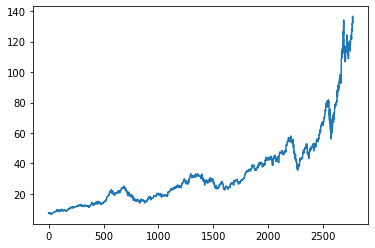

In [6]:
plt.plot(df.Close)
# plotting the new dataframe

In [7]:
# Moving Average: Mean of previous 'n' records used to analyze data points
# Here we are defining a 100 day Moving Average.
ma100 = df.Close.rolling(100).mean()

ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765    118.223525
2766    118.489800
2767    118.699475
2768    118.925550
2769    119.125175
Name: Close, Length: 2770, dtype: float64

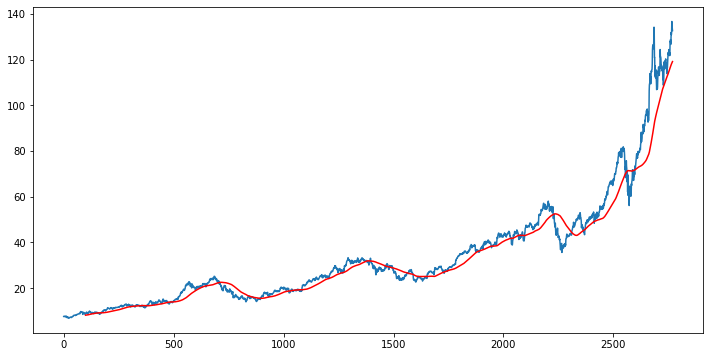

In [8]:
# Plotting 
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'red')

In [9]:
# Here we are defining a 200 day Moving Average.
ma200 = df.Close.rolling(200).mean()

ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765     99.158737
2766     99.494725
2767     99.866312
2768    100.218837
2769    100.573950
Name: Close, Length: 2770, dtype: float64

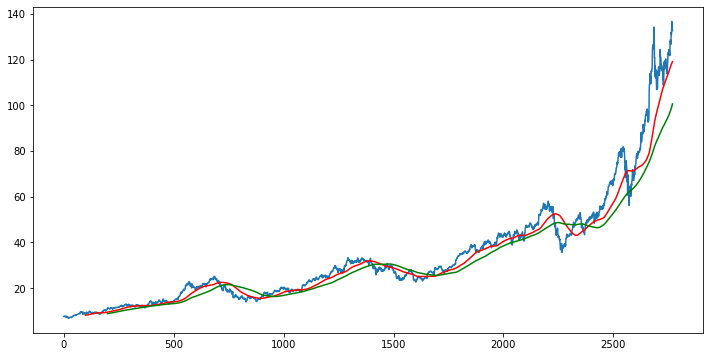

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'red')
plt.plot(ma200, 'green')

In [11]:
df.shape

(2770, 5)

In [12]:
# Splitting data into Training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

In [13]:
print (data_training.shape)
print (data_testing.shape)

(1938, 1)
(832, 1)


In [14]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
1938,39.912498
1939,39.570000
1940,39.970001
1941,39.667500
1942,39.682499


In [16]:
# Scaling down the data between '0' & '1'

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
# Scaling down the data using the scaler.fit_transform function imported from the library
# Simultaneously converting it into an array
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01953359],
       [0.02296349],
       [0.0233504 ],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(1838, 100, 1)

In [20]:
# ML Model
# !pip install keras
# !pip install --upgrade tensorflow
# above commands for first time keras and ternsorflow users

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
58/58 [==============================] - 28s 127ms/step - loss: 0.0966
Epoch 2/50
58/58 [==============================] - 7s 123ms/step - loss: 0.0105
Epoch 3/50
58/58 [==============================] - 7s 121ms/step - loss: 0.0082
Epoch 4/50
58/58 [==============================] - 7s 123ms/step - loss: 0.0089
Epoch 5/50
58/58 [==============================] - 7s 128ms/step - loss: 0.0059
Epoch 6/50
58/58 [==============================] - 8s 132ms/step - loss: 0.0061
Epoch 7/50
58/58 [==============================] - 8s 132ms/step - loss: 0.0064
Epoch 8/50
58/58 [==============================] - 8s 132ms/step - loss: 0.0064
Epoch 9/50
58/58 [==============================] - 8s 133ms/step - loss: 0.0055
Epoch 10/50
58/58 [==============================] - 8s 132ms/step - loss: 0.0048
Epoch 11/50
58/58 [==============================] - 8s 131ms/step - loss: 0.0053
Epoch 12/50
58/58 [==============================] - 8s 132ms/step - loss: 0.0048
Epoch 13/50
58/58 [=====

In [25]:
model.save('keras_model.h5')

In [26]:
data_testing.head()

,Close
1938,39.912498
1939,39.570000
1940,39.970001
1941,39.667500
1942,39.682499


In [27]:
data_training.tail(100)

,Close
1838,35.567501
1839,35.910000
1840,36.132500
1841,35.919998
1842,35.947498
...,...
1933,40.477501
1934,40.314999
1935,39.657501
1936,40.375000


In [28]:
past_100_days = data_training.tail(100)

In [29]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [30]:
final_df.head()

,Close
0,35.567501
1,35.910000
2,36.132500
3,35.919998
4,35.947498


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.97745334e-04],
       [3.58404460e-03],
       [5.78390957e-03],
       [3.68289840e-03],
       [3.95479352e-03],
       [3.60874862e-03],
       [1.08510253e-02],
       [1.31497441e-02],
       [1.20374596e-02],
       [1.07274298e-02],
       [1.67338264e-02],
       [2.67444246e-02],
       [2.91667767e-02],
       [2.73623646e-02],
       [2.90678851e-02],
       [3.43821920e-02],
       [3.33934653e-02],
       [3.28249711e-02],
       [1.99223803e-02],
       [2.55826944e-02],
       [2.68680202e-02],
       [2.91667767e-02],
       [2.86971362e-02],
       [2.75601100e-02],
       [2.88701398e-02],
       [2.82274958e-02],
       [2.83757953e-02],
       [2.61264846e-02],
       [2.71646193e-02],
       [3.27755253e-02],
       [2.90184394e-02],
       [3.03037652e-02],
       [3.25777800e-02],
       [3.16385368e-02],
       [1.67832345e-02],
       [7.98377455e-03],
       [1.08757293e-02],
       [7.34113050e-03],
       [5.19067357e-03],
       [1.97745334e-04],


In [32]:
input_data.shape

(932, 1)

In [33]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
               x_test.append(input_data[i-100: i]) 
               y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(832, 100, 1)
(832,)


In [35]:
# Making predictions

y_predicted = model.predict(x_test)

In [36]:
y_predicted.shape

(832, 1)

In [37]:
y_test

array([0.04315691, 0.03977061, 0.04372544, 0.0407346 , 0.0408829 ,
       0.03430804, 0.02768371, 0.02397607, 0.02066392, 0.02706577,
       0.02975997, 0.02741181, 0.02948808, 0.02872184, 0.03037791,
       0.02790615, 0.03262723, 0.03240478, 0.03373951, 0.03388781,
       0.03549448, 0.034135  , 0.03658206, 0.04372544, 0.04518377,
       0.04342881, 0.03408556, 0.03475294, 0.0345552 , 0.03685395,
       0.03514843, 0.03762019, 0.05156092, 0.06063227, 0.06636674,
       0.06105247, 0.06406802, 0.07491904, 0.07924462, 0.0806288 ,
       0.08416344, 0.0832736 , 0.08028276, 0.07855253, 0.07205179,
       0.06646563, 0.07145859, 0.06911039, 0.0686902 , 0.07650097,
       0.08099959, 0.08102429, 0.07884913, 0.07632796, 0.06745432,
       0.07331241, 0.071335  , 0.0682453 , 0.06784981, 0.06629259,
       0.06705886, 0.06718242, 0.07533924, 0.07294163, 0.07435055,
       0.07422695, 0.07855253, 0.08460834, 0.07996142, 0.07949181,
       0.08112315, 0.08112315, 0.07014856, 0.07022271, 0.07140

In [38]:
y_predicted

array([[0.1270225 ],
       [0.12726045],
       [0.1274038 ],
       [0.12744774],
       [0.12739766],
       [0.1272605 ],
       [0.12703961],
       [0.12672333],
       [0.12629321],
       [0.12573275],
       [0.12504375],
       [0.12425581],
       [0.12340656],
       [0.12253407],
       [0.12167668],
       [0.12086649],
       [0.12012836],
       [0.1194786 ],
       [0.11893447],
       [0.11850472],
       [0.11819328],
       [0.1179983 ],
       [0.11791334],
       [0.11792386],
       [0.11802523],
       [0.11822441],
       [0.11852358],
       [0.11890714],
       [0.11933763],
       [0.11977965],
       [0.12020241],
       [0.12058049],
       [0.12089811],
       [0.12116885],
       [0.12144524],
       [0.12179525],
       [0.12227169],
       [0.12290131],
       [0.12371162],
       [0.12473497],
       [0.12599023],
       [0.1274812 ],
       [0.1291948 ],
       [0.13109165],
       [0.13310964],
       [0.13515663],
       [0.13712242],
       [0.138

In [39]:
scaler.scale_

array([0.00988704])

In [40]:
scale_factor = 1/0.00988704
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

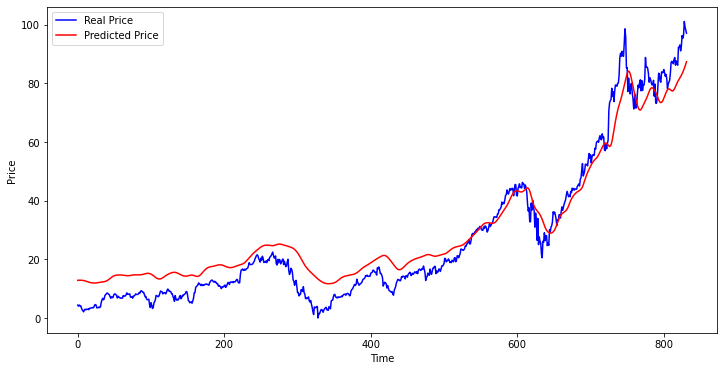

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'blue', label = 'Real Price')
plt.plot(y_predicted, 'red', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [42]:
# https://www.youtube.com/watch?v=s3CnE2tqQdo